# Substrate.py and Protease.py Tutorial

This tutorial describes the functionality of the 'substrate' and 'protease' subpackages of the PAA repo. 
- The **'substrate'** package is intended to help analyze and visualize peptide sequences.  
- The **'protease'** package has functions related to classifying proteases by class and finding protease orthologs across species. 

To demo the package, we will create a new instance of the SubstarteDatabase class in 'database.py' and test the different functions on all the substrate sequences in the database.   

We will first import all necessary packages

In [1]:
pwd

'/Users/mariaalonso/Work/protease_activity_analysis/notebooks'

In [2]:
cd ..

/Users/mariaalonso/Work/protease_activity_analysis


In [3]:
#Import packages
import pandas as pd
import scipy as sp
from scipy import stats
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy.stats import zscore
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.stats as ss
import csv
import pickle
import protease_activity_analysis as paa


Next, we will define arguments to the SubstrateDatabase class and generate an instance of the class, for more information on how to instantiate this class please visit the 'Database.py' tutorial. These are the user-defined inputs to the function:
- **data_files** : Input .csv files containing recombinant screening data to be incorported in the database. Here we will load 6 retrospective recombinant screen datafiles generated in the Bhatia Lab by screening different susbtrate libraries agianst a suit or recombinant proteases.
- **sequence_file**: .csv file containing all peptide sequences and peptide names for screened substrates. 
- **names_file**: .pkl file that maps all names given to the same sequence to a unified substrate name
- **aa_dict_file**: .pkl file that maps amino acids to different colors using the RasMol 'shapely' color scheme, based on Robert Fletterick’s “Shapely models.” 

In [4]:
# First run this to create a sample instance of the database class that contains example files to test functions with
data_files = ['data/screens/PAA/PAA_screens/Bhatia1_PAA.csv', 'data/screens/PAA/PAA_screens/Bhatia2_PAA.csv']
sequence_file = 'data/screens/PAA/Peptide_Inventory_150.csv'
names_file = 'data/screens/PAA/names_dict.pkl'
aa_dict_file = 'data/screens/PAA/aa_dict_color_matched.pkl'

data = paa.database.SubstrateDatabase(data_files, sequence_file, names_file, aa_dict_file = 'data/screens/PAA/kmer_analyses/aa_dict.pkl')

## Color-coding using the RasMol colors
The package supports color coding amino acids with any user-defined color scheme. Here we will use the RasMol colors to demonstrate this functionality.

To this end, we will use the 'paa.substrate.color_seq' function that requires passing in:
- 'ex_sub': The amino acid sequence to color code using single-letter amino acids. We will simply do a for loop to iterate through all sequence sin teh database
- 'all_natural'  (bool): Set to True if the amno acid only contains natural amino acids. This is necessary as the function cannot interpret non-natural amino acids. 
- 'aa_dict' (dict): .pkl storing RasMol color code, we will use the same as is used in the SubtrateDatabse class above.

In [10]:
# Lets just print our favorite substrate color coded with RasMol
print(paa.substrate.color_seq('GPLGLRSWG', all_nat, data.aa_dict))

GPLGLRSWG


In [5]:
# Lets test this across a larger range of usbstartes. 
# To do this we will color code all sequences in the database usign color_seq()
# Will use sample sequences in 'Sequence' column to test color_seq()
display(data.database)

# Display color-coded sequences for all natural AA in the database 
# Note that color-coding does not work on non-natural AA, hence these are returned as a regular print statement
print('\nSample output:\n')
for i in np.arange(data.database.shape[0]):
    sub = data.database.iloc[i]['Sequence']
    all_nat = data.database.iloc[i]['Composition'] == 'Natural'
    color_sub = paa.substrate.color_seq(sub, all_nat, data.aa_dict)
    print(color_sub)

,Name,Sequence,Composition,LUAD panel,Q/PQ/SQ/PX panel,LCS panel,BV panel,TQ panel,Names
0,S1,GRQRRVVGG,Natural,NaN,NaN,LQ1,NaN,NaN,"[nan, nan, LQ1, nan, nan]"
1,S2,GRQARAVGG,Natural,NaN,NaN,LQ2,NaN,NaN,"[nan, nan, LQ2, nan, nan]"
2,S3,GRRARVVGG,Natural,NaN,NaN,LQ3,NaN,NaN,"[nan, nan, LQ3, nan, nan]"
3,S4,GPLGLRSWG,Natural,PP04,Q6,LQ4,NaN,TQ6,"[PP04, Q6, LQ4, nan, TQ6]"
4,S5,GWEAVRSAMWG,Natural,NaN,NaN,LQ5,NaN,NaN,"[nan, nan, LQ5, nan, nan]"
...,...,...,...,...,...,...,...,...,...
145,S146,GGPRAAA[Phe(homo)]TSPG,Non-natural,NaN,NaN,NaN,BV13,NaN,"[nan, nan, nan, BV13, nan]"
146,S147,GGTGPPGYTG,Natural,NaN,NaN,NaN,BV14,NaN,"[nan, nan, nan, BV14, nan]"
147,S148,GGTGLPVYQG,Natural,NaN,NaN,NaN,BV15,NaN,"[nan, nan, nan, BV15, nan]"
148,S149,GG[Nle(O-Bzl)][Met(O)2][Oic][Abu],Non-natural,NaN,NaN,NaN,BV16,NaN,"[nan, nan, nan, BV16, nan]"



Sample output:

GRQRRVVGG
GRQARAVGG
GRRARVVGG
GPLGLRSWG
GWEAVRSAMWG
GWIGFRNAGAG
GPLGFRVG
GPLGLRG
GATPKIFNTEG
GETRIIKGFEG
GPLALWARG
GALVPRGSAG
GGLVPRGSG
GRQARQVGG
GLQARVVGG
GGGSGRSANAKG
GGVPRGG
GRQSRIVGGG
GILSRIVGGG
GGRKRKVGGSG
GDEKGKARDFFG
GKPISLISSG
GLAQAFRSG
GRPLALWESQG

GG[Orn]RSHPFTLYTA
GRQRRALEKG
GIQQRSLGGG
GLRGGKGGPPPPG
GGGAPFEMSA
GPRPFNYLG
GAGPRKAAKG
GAKIRKAKKG
GAKIRGQAKG
GNSGRAVTYG
GTYSRSRYLG
GRPKPQQFWG
GMAALIVRPDLG
GGRIFLRTAG
GSGDRMWggG
GSGERMMGgG
GsDDRRAGgG
GKLRVVGGHPG
GMAALITRPDFG
GELIQRNLSPAG
GSNLTRIVGGQG
GYQIKPLKSTDG
GNIPMGLLYNKG
GPQGRIVGG
GIKPRIVGG
GPMKRLTLG
GGLGPKGQTG
GGAGGAQMGA
GGATDVTTTP
GGLSLPETGE
GSPLAQAVRSSS
GSSMAQTLTLRSSS
GGGPLGLARG
GMERMGG
GGGGPGG
GEWWMDYQG
GFLRRQFKVVT
GVGRPEWWMDG
GLGALLRVKRLE
GLASASTMDG
GGKGRGLSLG
GHGDQMAQKS
GRAEQQRLKG
GRAEQQRLG
GDQMAQKSQG
GAIEFDSG
GGPQGIWGQ
GGPVPLSLVM
GGPLGVRGK
GGfPRSGGG
GSGSKIIGGG
GPLGMRG
GAPFEMSAG

GGP[Cha]G[Cys(Me)]HAGC
GGPVGLIG
GGAAEAISDA
GGAQPDALNV
GGDIVTVANA
GGDLGLKSVP
GGDVMASQKR
GGESDELQTI
GGFHPLHSKI
GGGHARLVHV
GGHIANVER

## Calculating similarity scores
Often, it is useful to get a readout of sequence similrity between two subtrates of interest. To this end, we have created the 'paa.substrate.similarity(str1, str2)' function, that returns two different similarity scores between 2 strings of interest:
- **Lenvenschtein Similarity Ratio**: is derived from the Levenschtein edit distance that is infromally defined as the minimum number of single-character edits (insertions, deletions or substitutions) required to change one word into the other. The greater the distance, the lower this ratio (of similarity) will be, with perfectly matching strings scoring 100%. 
- **Partial Lenvenschtein Similarity Ratio**: is a modified **Lenvenschtein Ratio** that allows to perform substring matching. It works by taking the shortest string and mathcin git to all substrings that are of the same length in the longer string. It will thus be helpful in identifying peptides that may have highly similar substrings but are different lengths.   

Sample strings below illustrate differences between the similarity ratio and the partial similarity ratio. To learn more about the package used for this purpose (fuzzywuzzy), please visit: https://pypi.org/project/fuzzywuzzy/

In [10]:
# Calculate similarity score between 2 strings as per the Lenvenschtein Ratio or the Partial Lenvenschtein Ratio
# Sample strings illustrate differences between the similarity ratio and the partial similarity ratio
str1 = 'PLGLA'
str2 = 'PLGVA'
str3 = 'PLGL'

sim_12, par_sim_12 = paa.substrate.similarity(str1, str2)
sim_13, par_sim_13 = paa.substrate.similarity(str1, str3)

print('Similarity Ratio between '+ (str1) + ' and ' + (str2) + ':', sim_12)
print('Partial Similarity Ratio between '+ (str1) + ' and ' + (str2) + ':', par_sim_12)

print('\nSimilarity Ratio between '+ (str1) + ' and ' + (str3) + ':', sim_13)
print('Partial Similarity Ratio between '+ (str1) + ' and ' + (str3) + ':', par_sim_13)


Similarity Ratio between PLGLA and PLGVA: 80
Partial Similarity Ratio between PLGLA and PLGVA: 80

Similarity Ratio between PLGLA and PLGL: 89
Partial Similarity Ratio between PLGLA and PLGL: 100


## Plotting a pairwise similairy matrix for a peptide library of interest
Globally, for a substrate library of interest it can be useful to visualize and cluster pairwise simialirty scores for all substartes in the library. This can help identify clusters of highly similar substrates and understand the degree of overlap in sequence space of peptides in the library. 

To this end, we have developed the 'paa.substrate.similarity_matrix(subs, seqs)' function that takes in the names of the peptides and their sequences, respectively, and generates heatmaps with corresponding hierarchical clustering using both the **Lenvenschtein Similarity Ratio** and the **Partial Lenvenschtein Similarity Ratio**. The function returns both the similarity matrices cantaining pairwise similarity scores used as inputs as well as the clustergrid instances displayed whose different attributes can be further explored (e.g. could re-cover the clustering order of substrates).

/Users/mariaalonso/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.


<Figure size 432x288 with 0 Axes>

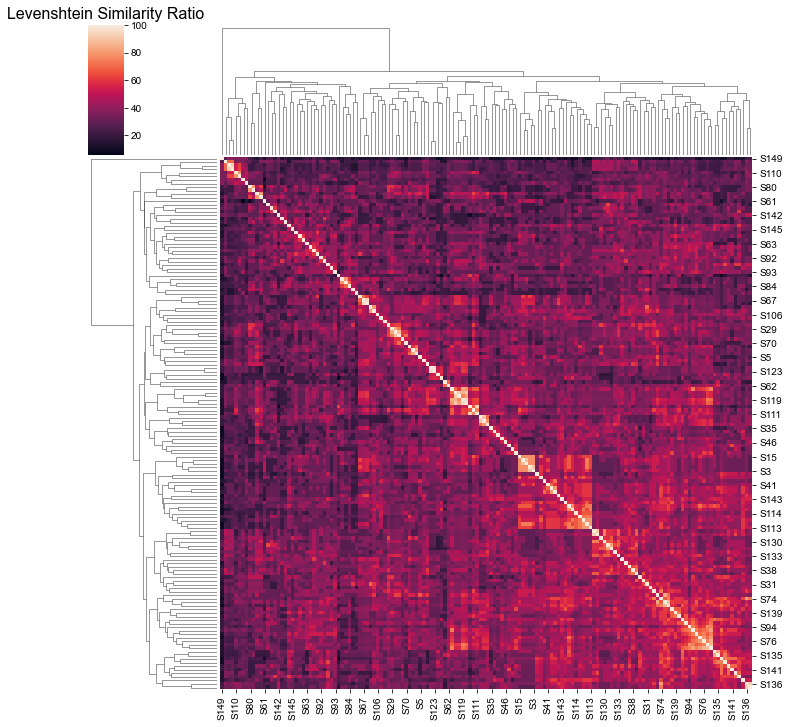

<Figure size 432x288 with 0 Axes>

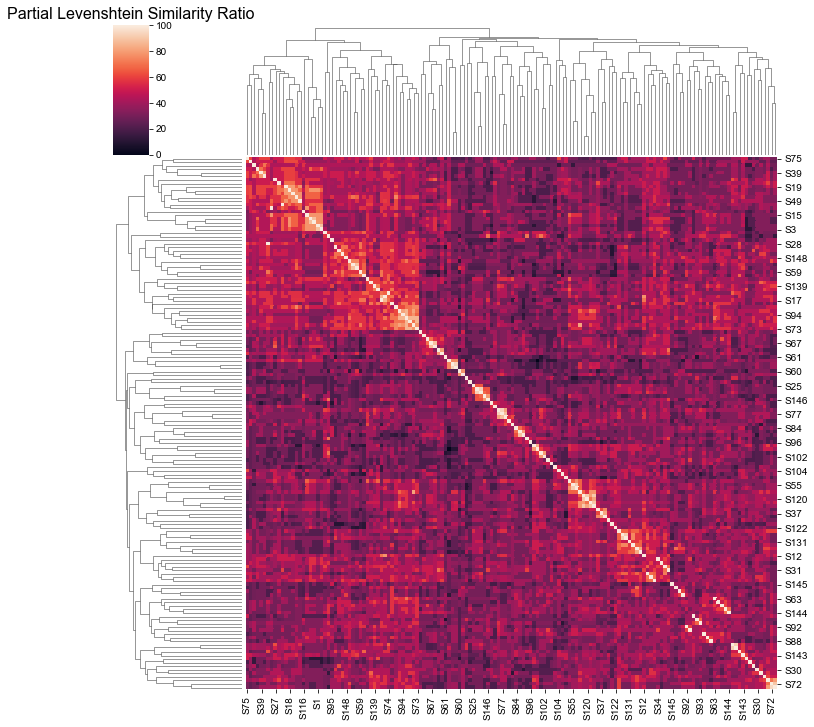

In [11]:
# Generate pairwise similarity matrix between all peptides of interest
subs = data.database.iloc[:, 0].to_list()  
seqs = data.database['Sequence'].to_list()

sim_m, sim_par_m, cluster_grid_sim_m, cluster_grid_sim_par_m = paa.substrate.similarity_matrix(subs, seqs)

## Exploring k-mers in the library
In addition to overall sequence similarity metrics, it is often useful to characterize the distribution of kmers of interest within a dataset. This is powerful in helping identify potential shared cleavage motifs between peptides or in characterizing library diversity and bias. 

### Generating kmer dictionaries
Lets first break down all sequences in the library into kmers of different length k using 'paa.substrate.generate_kmers(subs, seqs, k)'. To do this we will again use the sequences in the database, filtering first for those with only natural sequences. Here we will genrate kmers from length 3 to 8.

In [12]:
# Filter for natural AA only 
natural = data.database[data.database['Composition'] == 'Natural']
# Then we will pull out and print names and sequences of substrates of ineterest
subs = natural.iloc[:, 0].to_list()  
seqs = natural['Sequence'].to_list()

# Print inputs to function
print('Sample substrates of interest:\n',  subs ,'\n')
print('Sample sequence of interest:\n',  seqs)

# Generate_kmer for all peptides of interest of lengths in kmer_list: [3,4,5,6,7,8]
kmer_list = [3,4,5,6,7,8]
kmer_dict = {}
for k in kmer_list:
    kmer_dict[k] = paa.substrate.generate_kmers(subs, seqs, k)

print('Visualize kmer_dict for k=4')
print(kmer_dict[4])

Sample substrates of interest:
 ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23', 'S24', 'S26', 'S27', 'S28', 'S29', 'S30', 'S31', 'S32', 'S33', 'S34', 'S35', 'S36', 'S37', 'S38', 'S39', 'S40', 'S41', 'S42', 'S43', 'S44', 'S45', 'S46', 'S47', 'S48', 'S49', 'S50', 'S51', 'S52', 'S53', 'S54', 'S55', 'S56', 'S57', 'S58', 'S59', 'S60', 'S61', 'S62', 'S63', 'S64', 'S65', 'S66', 'S67', 'S68', 'S69', 'S70', 'S71', 'S72', 'S73', 'S74', 'S75', 'S76', 'S77', 'S79', 'S80', 'S81', 'S82', 'S83', 'S84', 'S85', 'S86', 'S87', 'S88', 'S89', 'S90', 'S91', 'S92', 'S93', 'S94', 'S95', 'S96', 'S97', 'S98', 'S99', 'S100', 'S101', 'S102', 'S104', 'S105', 'S106', 'S107', 'S108', 'S109', 'S111', 'S112', 'S113', 'S114', 'S115', 'S117', 'S118', 'S119', 'S120', 'S121', 'S122', 'S124', 'S125', 'S126', 'S127', 'S130', 'S131', 'S132', 'S133', 'S134', 'S135', 'S138', 'S139', 'S140', 'S141', 'S143', 'S144', 'S145', '

### Creating dictionaries storing overlapping kmers between different substrates
This will allow to map kmers to substrates as well as characterize the frequency with which each kmer appears in the library. For this we will feed the 'kmer_dict's we genrated above into the 'paa.substrate.find_overlapping_kmers(kmer_dict)' function

In [13]:
# Generate dictionary where keys are kmers and values are substrates containing each kmer
kmer_overlap = {}
for k in kmer_list:
    kmer_overlap[k] = paa.substrate.find_overlapping_kmers(kmer_dict[k])
print('Visualize kmer_overlap for k=4')
print(kmer_overlap[4])


Number of unique kmers is: 728
Number of unique kmers is: 827
Number of unique kmers is: 758
Number of unique kmers is: 659
Number of unique kmers is: 541
Number of unique kmers is: 413
Visualize kmer_overlap for k=4
{'AAAT': ['S89'], 'AAEA': ['S80', 'S102'], 'AAFA': ['S150'], 'AAKG': ['S31'], 'AALI': ['S37', 'S43'], 'AALT': ['S131'], 'AANL': ['S108'], 'AATQ': ['S89'], 'AEAI': ['S80', 'S102'], 'AEQQ': ['S67', 'S68'], 'AFAG': ['S150'], 'AFRR': ['S107'], 'AFRS': ['S23'], 'AGAG': ['S6'], 'AGGA': ['S52'], 'AGIL': ['S91'], 'AGLV': ['S97'], 'AGPR': ['S31'], 'AGgG': ['S41'], 'AIEF': ['S70'], 'AISD': ['S80'], 'AKIR': ['S32', 'S33'], 'AKKG': ['S32'], 'ALAV': ['S122'], 'ALEE': ['S120'], 'ALEK': ['S26'], 'ALIT': ['S43'], 'ALIV': ['S37'], 'ALKQ': ['S144'], 'ALLR': ['S63'], 'ALNV': ['S81'], 'ALTA': ['S131'], 'ALVP': ['S12'], 'ALWA': ['S11'], 'ALWE': ['S24'], 'ALWR': ['S119', 'S121'], 'AMWG': ['S5'], 'ANAK': ['S16'], 'ANLT': ['S108'], 'ANVE': ['S88'], 'APFE': ['S29', 'S77', 'S118'], 'AQAF': ['S23'],

### Looking up a kmer of interest
We are now finally ready to look up a kmer of interest in pur library. To this end we will use the 'paa.substrate.search_kmer('PLGL', kmer_dict_q)' that takes a kmer of interest as well as the kmer_dict of the corresponding length in and retrieves the names of the substrates containing this kmer.

In [14]:
# Search through kmer_overlap[4] to find peptides with 'PLGL' motif using search_kmer 
kmer_dict_q = kmer_overlap[4]
PLGL_info = paa.substrate.search_kmer('PLGL', kmer_dict_q)
display(PLGL_info)

# To validate this information we can go back to our initial dataframe and check sequences
for pep in PLGL_info['Peptide'].to_list():
    display(data.database[data.database['Name'] == pep])

,Peptide
0,S4
1,S8
2,S57
3,S94


,Name,Sequence,Composition,LUAD panel,Q/PQ/SQ/PX panel,LCS panel,BV panel,TQ panel,Names
3,S4,GPLGLRSWG,Natural,PP04,Q6,LQ4,NaN,TQ6,"[PP04, Q6, LQ4, nan, TQ6]"


,Name,Sequence,Composition,LUAD panel,Q/PQ/SQ/PX panel,LCS panel,BV panel,TQ panel,Names
7,S8,GPLGLRG,Natural,NaN,NaN,LQ9,NaN,NaN,"[nan, nan, LQ9, nan, nan]"


,Name,Sequence,Composition,LUAD panel,Q/PQ/SQ/PX panel,LCS panel,BV panel,TQ panel,Names
56,S57,GGGPLGLARG,Natural,NaN,NaN,LQ64,NaN,NaN,"[nan, nan, LQ64, nan, nan]"


,Name,Sequence,Composition,LUAD panel,Q/PQ/SQ/PX panel,LCS panel,BV panel,TQ panel,Names
93,S94,GGPLGLRWW,Natural,NaN,SQ19,NaN,NaN,TQ29,"[nan, SQ19, nan, nan, TQ29]"


# Protease.py
Now we will explore the protease-reated functions in protease.py.

- **paa.protease.classify_protease('MMP13')**: Takes the gene name for a human protease of interest and return its protease class membership. Source data is from Uniprot.
- **paa.protease.species_to_species('Human', 'Mouse', 'MMP13')**: Takes in the species of origin, the species we want ot map to and the gene name of the protease of interest and returns its ortholog in teh target species. Rat, Mouse, Chimpanzee and Human species are supported. Source data is from The Mammalian Degradome Database (http://degradome.uniovi.es/dindex.html)


In [15]:
paa.protease.classify_protease('MMP13')

'Metallo'

In [16]:
paa.protease.species_to_species('Human', 'Mouse', 'MMP13')


'Mmp13'